In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
import sklearn.preprocessing as sp
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier , RandomForestClassifier ,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


In [3]:
df.head()
# drop [PassengerId,name,Cabin,Tiket]
# target Survived
# fill [Age , Embarked]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(columns=['PassengerId','Name','Cabin','Ticket'],inplace=True)

In [5]:
df['Age']=df['Age'].fillna(value=round(df['Age'].median()))
# df['Age']=df['Age'].interpolate()
df["Embarked"].fillna(value=df["Embarked"].mode()[0],inplace=True)

C:\Users\basil\AppData\Local\Temp\ipykernel_14588\3113498062.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(value=df["Embarked"].mode()[0],inplace=True)


In [6]:
df=df.drop_duplicates()

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
la = sp.LabelEncoder()
df['Sex']=la.fit_transform(df['Sex'])
df = pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [9]:
df['familyn'] = df['SibSp']+df['Parch']

In [10]:
df=df.drop(columns=['SibSp','Parch'])

In [11]:
df['familyn']=df['familyn']+1

Survived = 0.354482596944557


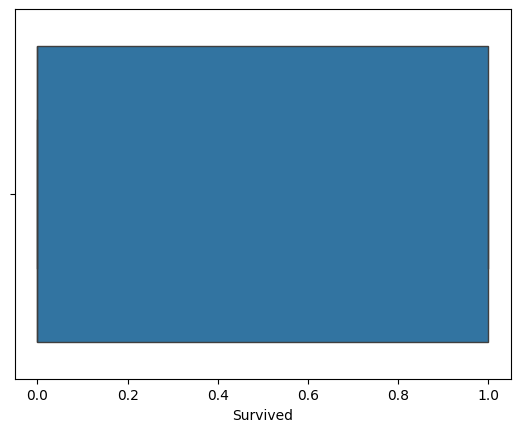

Pclass = -0.4947674114974336


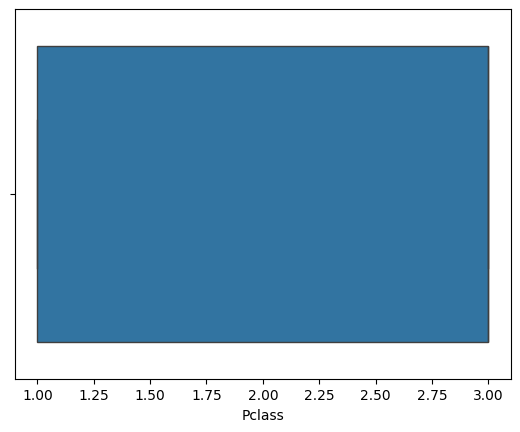

Sex = -0.5095774648114001


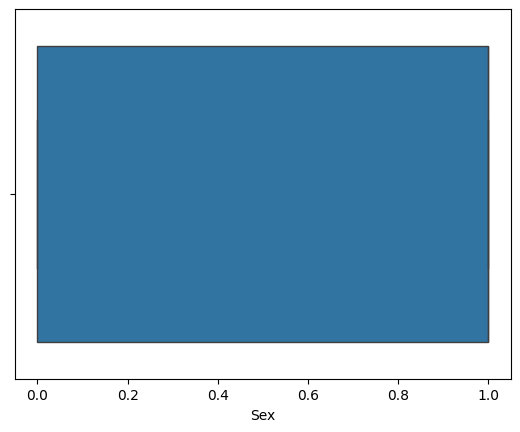

Age = 0.44198678493510685


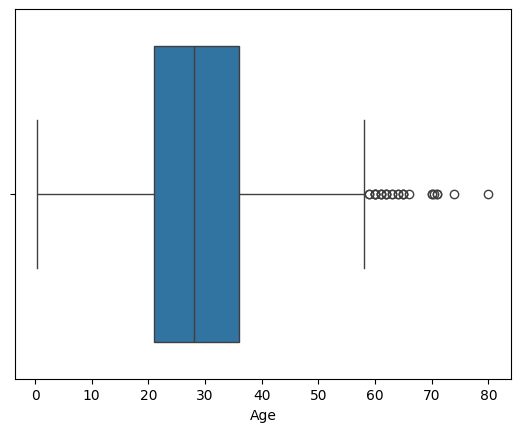

Fare = 4.549950352869661


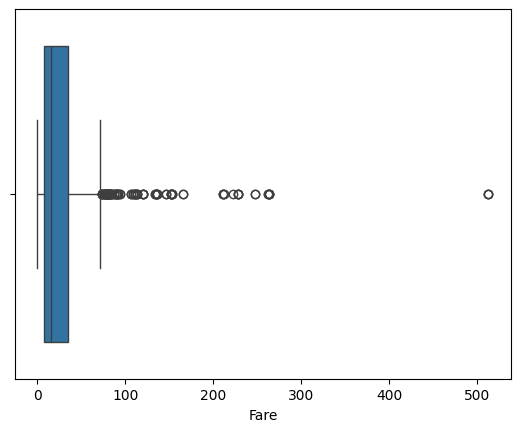

Embarked_Q = 3.237827278542139


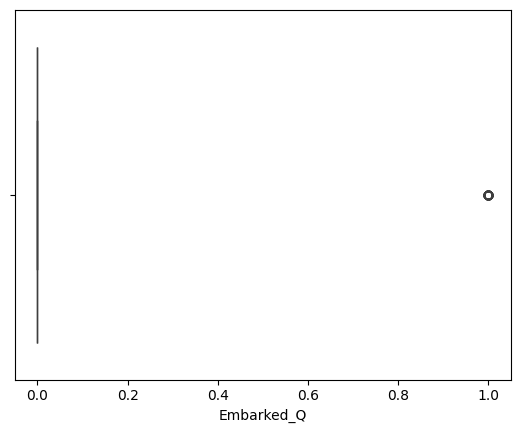

Embarked_S = -1.0106698383184574


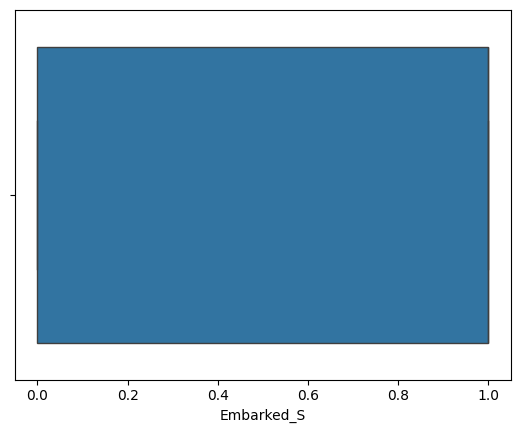

familyn = 2.2636787073030686


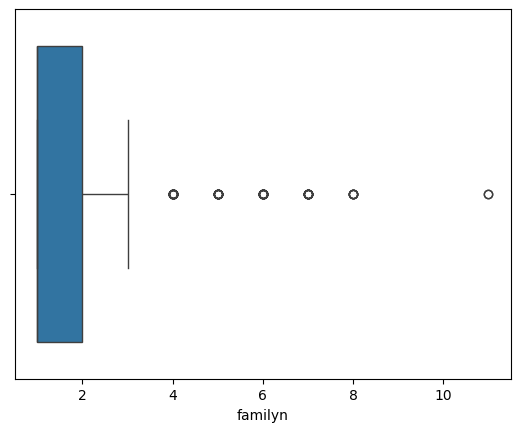

In [12]:
for i in df.columns:
    sns.boxplot(x=df[i])
    print(f'{i} = {df[i].skew()}')
    plt.show()

In [13]:
st = sp.StandardScaler()
df['Age'] = st.fit_transform(df['Age'].values.reshape(-1,1))
df['Fare'] = st.fit_transform(df['Fare'].values.reshape(-1,1))
df['familyn'] = st.fit_transform(df['familyn'].values.reshape(-1,1))

In [14]:
x = df.drop(columns='Survived')
y = df['Survived']

In [15]:
x_train,x_test , y_train , y_test = train_test_split(x,y,test_size=.2,random_state=42)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.70      0.72      0.71        60

    accuracy                           0.77       155
   macro avg       0.76      0.76      0.76       155
weighted avg       0.77      0.77      0.77       155



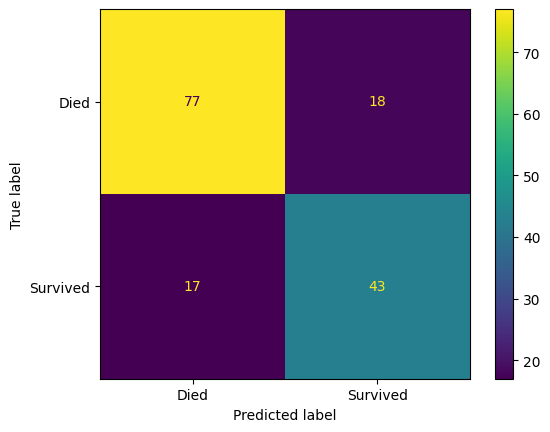

In [16]:
# logistic regression
model = LogisticRegression()
model.fit(x_train, y_train)
log_pred = model.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,log_pred),display_labels=["Died", "Survived"]).plot()
print(classification_report(y_test,log_pred))


              precision    recall  f1-score   support

           0       0.78      0.84      0.81        95
           1       0.72      0.63      0.67        60

    accuracy                           0.76       155
   macro avg       0.75      0.74      0.74       155
weighted avg       0.76      0.76      0.76       155



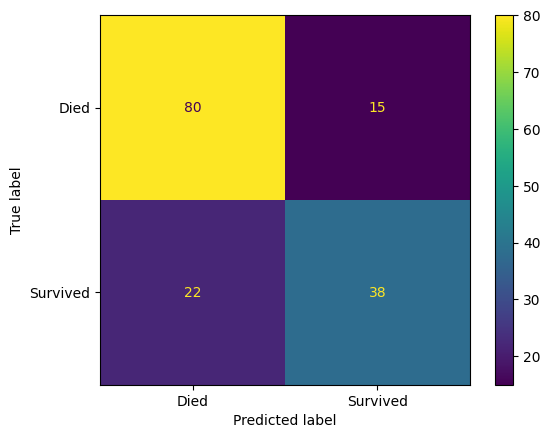

In [17]:
# knn
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, knn_pred),display_labels=["Died", "Survived"]).plot()
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        95
           1       0.74      0.70      0.72        60

    accuracy                           0.79       155
   macro avg       0.78      0.77      0.77       155
weighted avg       0.79      0.79      0.79       155



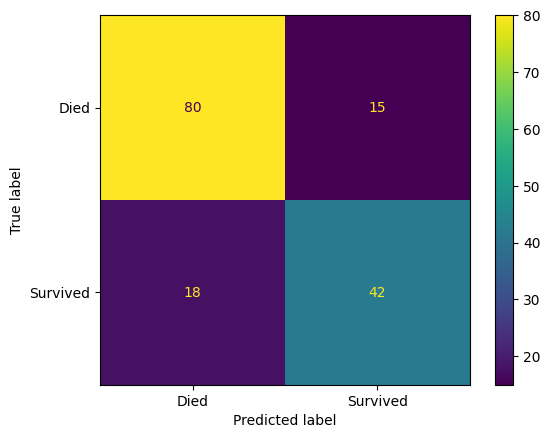

In [18]:
# random forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, rf_pred),display_labels=["Died", "Survived"]).plot()
print(classification_report(y_test, rf_pred))



              precision    recall  f1-score   support

           0       0.77      0.71      0.74        95
           1       0.59      0.67      0.62        60

    accuracy                           0.69       155
   macro avg       0.68      0.69      0.68       155
weighted avg       0.70      0.69      0.69       155



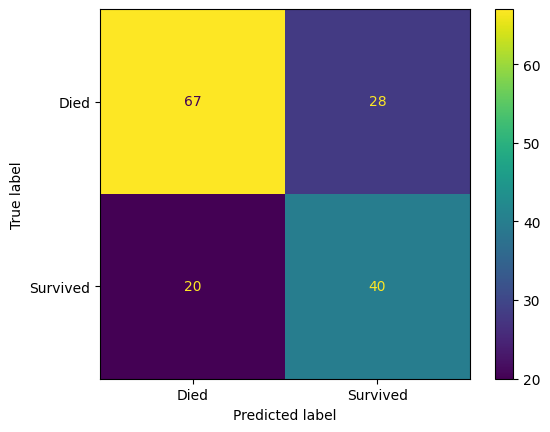

In [19]:
# tree
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
tree_pred = tree_model.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,tree_pred),display_labels=["Died", "Survived"]).plot()

print(classification_report(y_test, tree_pred))


              precision    recall  f1-score   support

           0       0.85      0.93      0.89        95
           1       0.87      0.75      0.80        60

    accuracy                           0.86       155
   macro avg       0.86      0.84      0.85       155
weighted avg       0.86      0.86      0.86       155



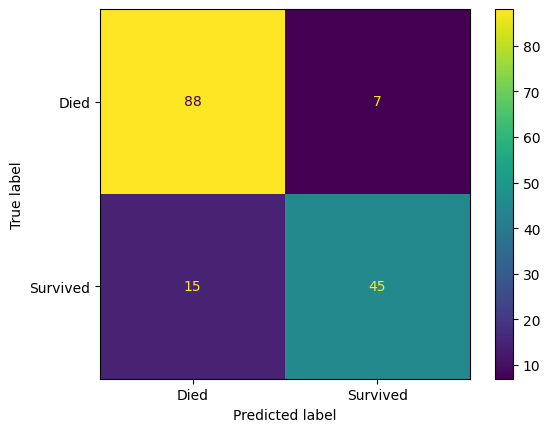

In [20]:
# svm
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,svm_pred),display_labels=["Died", "Survived"]).plot()

print(classification_report(y_test, svm_pred))


              precision    recall  f1-score   support

           0       0.82      0.91      0.86        95
           1       0.82      0.68      0.75        60

    accuracy                           0.82       155
   macro avg       0.82      0.79      0.80       155
weighted avg       0.82      0.82      0.82       155



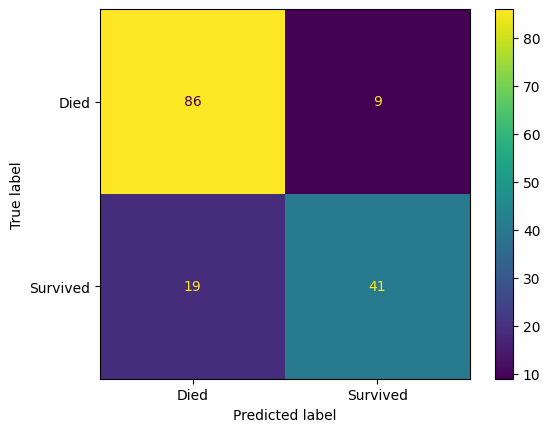

In [21]:
# gradient boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
gb_pred = gb_model.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,gb_pred),display_labels=["Died", "Survived"]).plot()


print(classification_report(y_test, gb_pred))



              precision    recall  f1-score   support

           0       0.82      0.88      0.85        95
           1       0.79      0.68      0.73        60

    accuracy                           0.81       155
   macro avg       0.80      0.78      0.79       155
weighted avg       0.81      0.81      0.80       155



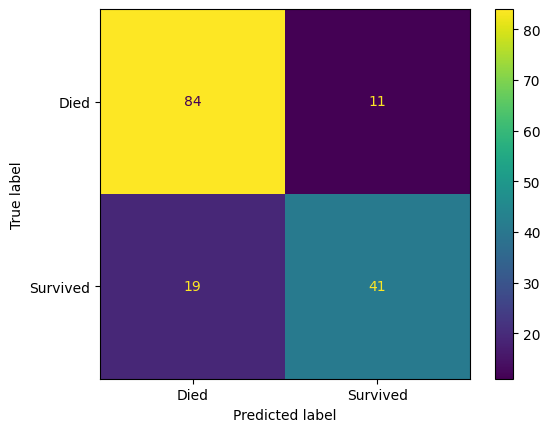

In [22]:
# xgboost
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,xgb_pred),display_labels=["Died", "Survived"]).plot()

print(classification_report(y_test, xgb_pred))
